In [1]:
# import image module
from IPython.display import Image 
  
# get the image 
Image(url="https://www.lifewire.com/thmb/lSat_4sjfHRJFHyymYKXAckvZrQ=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-1301799123-5a2fa1c521ba4aa691b7d915b5f288f8.jpg", width=1000)

## Introduction: 
The TED Talk dataset provides comprehensive information about various TED Talks over the years. TED (Technology, Entertainment, Design) is a platform where influential speakers from around the world share their ideas and knowledge on a wide array of topics. This dataset is a valuable resource for analyzing the trends, popularity, and impact of these talks.

#### Objectives:
The primary objectives of this analysis are:

- To explore the distribution and trends of TED Talks over the years.
- To identify the most popular TED Talks based on views and likes.
- To identify the most popular TED Talks based on views to likes ratio.
- To explore the videos released by TED Talk Authors.
- To build predictive models to see in which year and months most TED Talks videos released.

This dataset provides a rich source of information for gaining insights into the world of TED Talks and understanding the impact of these influential presentations.

#### Dataset Description:

The dataset consists of the following columns:

- title: The title of the TED Talk.
- author: The speaker or author of the TED Talk.
- date: The month and year when the TED Talk was published.
- views: The number of views the TED Talk has received.
- likes: The number of likes the TED Talk has received.
- link: The URL link to the TED Talk.





In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ted-talks/data.csv


### 1 Loading Dateset

In [3]:
path = "/kaggle/input/ted-talks/data.csv"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path)

##### 1.1 Showing first/top 5 rows.

In [5]:
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


##### 1.2 Showing last 5 rows.

In [6]:
df.tail()

,title,author,date,views,likes,link
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...
5439,Averting the climate crisis,Al Gore,February 2006,3600000,109000,https://ted.com/talks/al_gore_averting_the_cli...


##### 1.3 Showing information about Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


### 2 Dealing with Null and Duplicate Values.

##### 2.1 Checking Null Values.

In [8]:
df.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [9]:
df[df['author'].isnull()] ##finding which row is null

,title,author,date,views,likes,link
3039,Year In Ideas 2015,NaN,December 2015,532,15,https://ted.com/talks/year_in_ideas_2015


##### 2.2 Removing Null Values.

In [10]:
df.dropna(inplace = True)


##### 2.3 Checking duplicate values.

In [11]:
df.drop_duplicates()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [12]:
print(len(df) - len(df.drop_duplicates()))

0


### 3 Exploratory Data Analysis.

##### 3.1 Explore Views Column.

In [13]:
arr = np.array(df['views'])
print(arr)
print("------- Views Annalysis -------")
print("Maximum          :",np.max(arr))
print("Minimum          :",np.min(arr))
print("Total            :",np.sum(arr))
print("Avarege/Mean     :",int(np.mean(arr)))
print("Median           :",np.median(arr))
print("StadardDaviation :",int(np.std(arr)))
print("-"*32)

[ 404000  214000  412000 ... 2900000 2000000 3600000]
------- Views Annalysis -------
Maximum          : 72000000
Minimum          : 1200
Total            : 11214972679
Avarege/Mean     : 2061954
Median           : 1300000.0
StadardDaviation : 3566988
--------------------------------


##### 3.2 Explore Likes Column.

In [14]:
arr1 = np.array(df['likes'])
print(arr1)
print("------- Likess Annalysis -------")
print("Maximum          :",np.max(arr1))
print("Minimum          :",np.min(arr1))
print("Total            :",np.sum(arr1))
print("Avarege/Mean     :",int(np.mean(arr1)))
print("Median           :",np.median(arr1))
print("StadardDaviation :",int(np.std(arr1)))
print("-"*32)

[ 12000   6400  12000 ...  88000  60000 109000]
------- Likess Annalysis -------
Maximum          : 2100000
Minimum          : 37
Total            : 340585420
Avarege/Mean     : 62619
Median           : 41000.0
StadardDaviation : 107643
--------------------------------


##### 3.3 Explore Titles Column.

In [15]:
df['title'].unique()

array(['Climate action needs new frontline leadership',
       'The dark history of the overthrow of Hawaii',
       'How play can spark new ideas for your business', ...,
       'Greening the ghetto', 'Simplicity sells',
       'Averting the climate crisis'], dtype=object)

In [16]:
print(len(df) - len(df['title'].unique()))

0


##### 3.4 Explore Authors Column.

In [17]:
print(df['author'].unique())
print('Number of Authors : ',len(df['author'].unique()))

['Ozawa Bineshi Albert' 'Sydney Iaukea' 'Martin Reeves' ... 'Jeff Han'
 'Jehane Noujaim' 'Rick Warren']
Number of Authors :  4443


### 4 Data Cleaning and Feature Engineering.

##### 4.1 Creating new columns from date[month & year].

In [18]:
month = []
year = []

for i in df['date']:
    month.append(i.split(' ')[0])
    year.append(i.split(' ')[1])
    
df['month'] = month
df['year'] = year
df.head()

,title,author,date,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021


##### 4.2 Cleaning link column.

In [19]:
df['link'] = [i.split("/")[-1] for i in df['link']]
df.head()

,title,author,date,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,ozawa_bineshi_albert_climate_action_needs_new_...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,sydney_iaukea_the_dark_history_of_the_overthro...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,martin_reeves_how_play_can_spark_new_ideas_for...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,james_k_thornton_why_is_china_appointing_judge...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,mahendra_singhi_cement_s_carbon_problem_and_2_...,October,2021


##### 4.3 Creating views to like ratio column.

In [20]:
df['views_to_like_ratio'] = round(df['views']/df['likes'],2)
df.head()

,title,author,date,views,likes,link,month,year,views_to_like_ratio
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,ozawa_bineshi_albert_climate_action_needs_new_...,December,2021,33.67
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,sydney_iaukea_the_dark_history_of_the_overthro...,February,2022,33.44
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,martin_reeves_how_play_can_spark_new_ideas_for...,September,2021,34.33
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,james_k_thornton_why_is_china_appointing_judge...,October,2021,35.58
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,mahendra_singhi_cement_s_carbon_problem_and_2_...,October,2021,33.33


In [21]:
arr2 = np.array(df['views_to_like_ratio'])
print(arr2)
print("------- Ratio Annalysis -------")
print("Maximum :",np.max(arr2))
print("Minimum :",np.min(arr2))
print("Total   :",np.sum(arr2))
print("Avarege :",int(np.mean(arr2)))
print("-"*32)

[33.67 33.44 34.33 ... 32.95 33.33 33.03]
------- Ratio Annalysis -------
Maximum : 36.4
Minimum : 30.4
Total   : 180107.18
Avarege : 33
--------------------------------


##### 4.4 Removing Year Outliers.

In [22]:
df = df[df['year'] >= '1998']

### 5 Data Analysis

#### 5.1 Authors

##### 5.1.1) Top 20 Authors with Most number of speeches as Ted.

In [23]:
df.groupby(by = 'author').size().sort_values(ascending = False).head(20)
#df.groupby('author').size().sort_values(ascending= False).reset_index().head(20)


author
Alex Gendler        45
Iseult Gillespie    33
Matt Walker         18
Alex Rosenthal      15
Elizabeth Cox       13
Emma Bryce          12
Juan Enriquez       11
Daniel Finkel       11
Wendy De La Rosa     9
Hans Rosling         9
Jen Gunter           9
Mona Chalabi         9
Dan Finkel           9
Greg Gage            9
Bill Gates           8
 TED-Ed              7
Dan Kwartler         7
Marco Tempest        7
Rives                6
Fabio Pacucci        6
dtype: int64

##### 5.1.1.1) Bar graph for the Top 20 Authors with Most number of speeches as Ted.

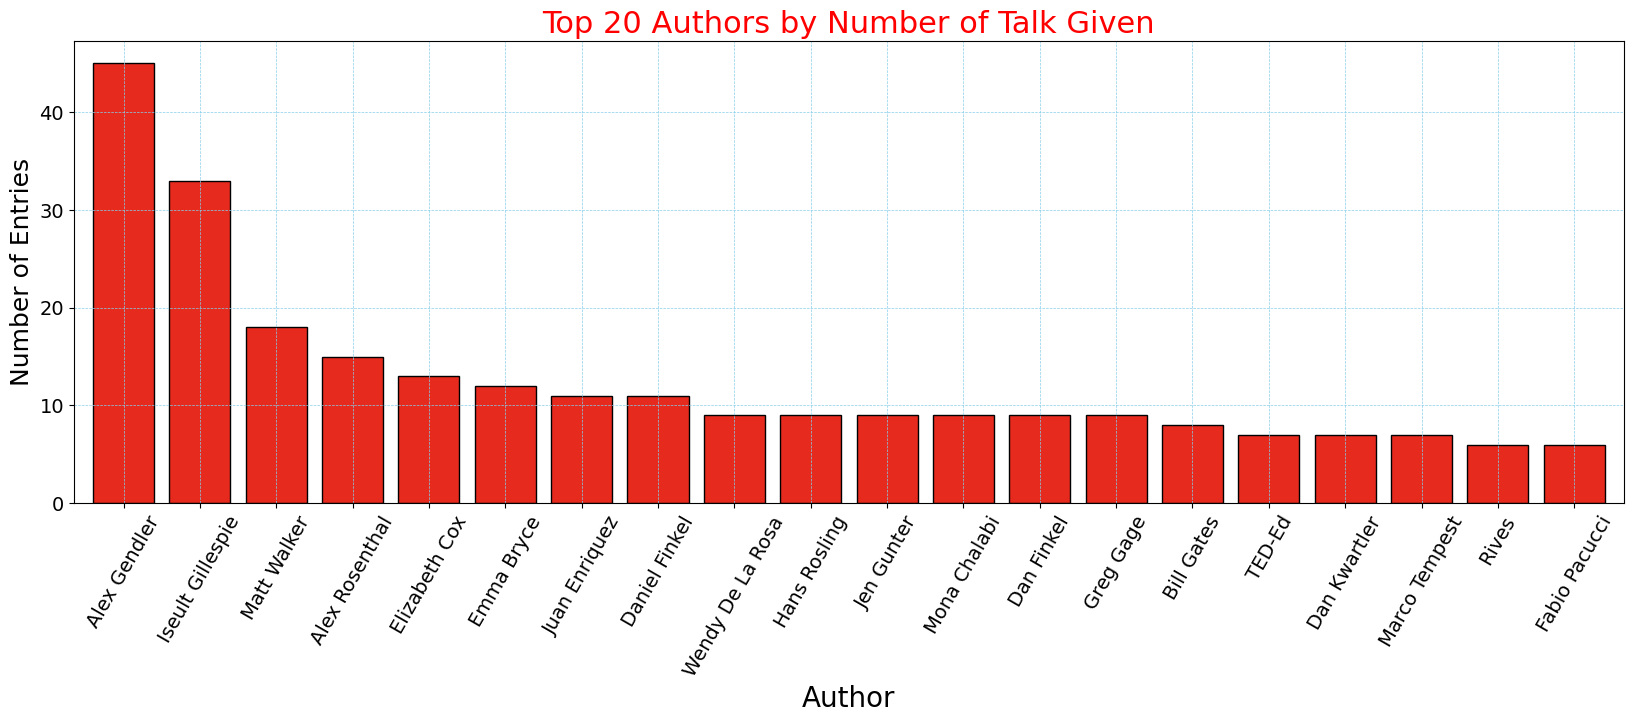

In [24]:
ax = df.groupby(by='author').size().sort_values(ascending=False).head(20).plot(
    kind='bar',
    color='#E62B1E',        # TED Red color for the bars
    edgecolor='black',      # Black edges for better contrast
    figsize=(20, 6),        # the figure size
    width=0.8               # the width of the bars
)

ax.set_title('Top 20 Authors by Number of Talk Given', fontsize=22, color='Red')
ax.set_xlabel('Author', fontsize=20, color='black')
ax.set_ylabel('Number of Entries', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=14, colors='black')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=14, colors='black')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='skyblue')

plt.show()

##### 5.1.2) Top 20 Authors with Most number of views as Ted. 

In [25]:
df.groupby(by = 'author').sum()['views'].sort_values(ascending = False).head(20)

author
Alex Gendler                187196000
Sir Ken Robinson             95654000
Bill Gates                   77800000
Simon Sinek                  74800000
Brené Brown                  72000000
Julian Treasure              64300000
Amy Cuddy                    64000000
Tim Urban                    60000000
Iseult Gillespie             54998000
Mia Nacamulli                44174000
Sam Berns                    43000000
Robert Waldinger             41000000
Esther Perel                 39400000
Cameron Russell              38000000
Mary Roach                   37000000
Graham Shaw                  37000000
Hans Rosling                 36255000
Elon Musk                    35800000
Chimamanda Ngozi Adichie     34800000
Tom Thum                     34000000
Name: views, dtype: int64

##### 5.1.2.1) Bar graph for the Top 20 Authors with Most number of views as Ted. 

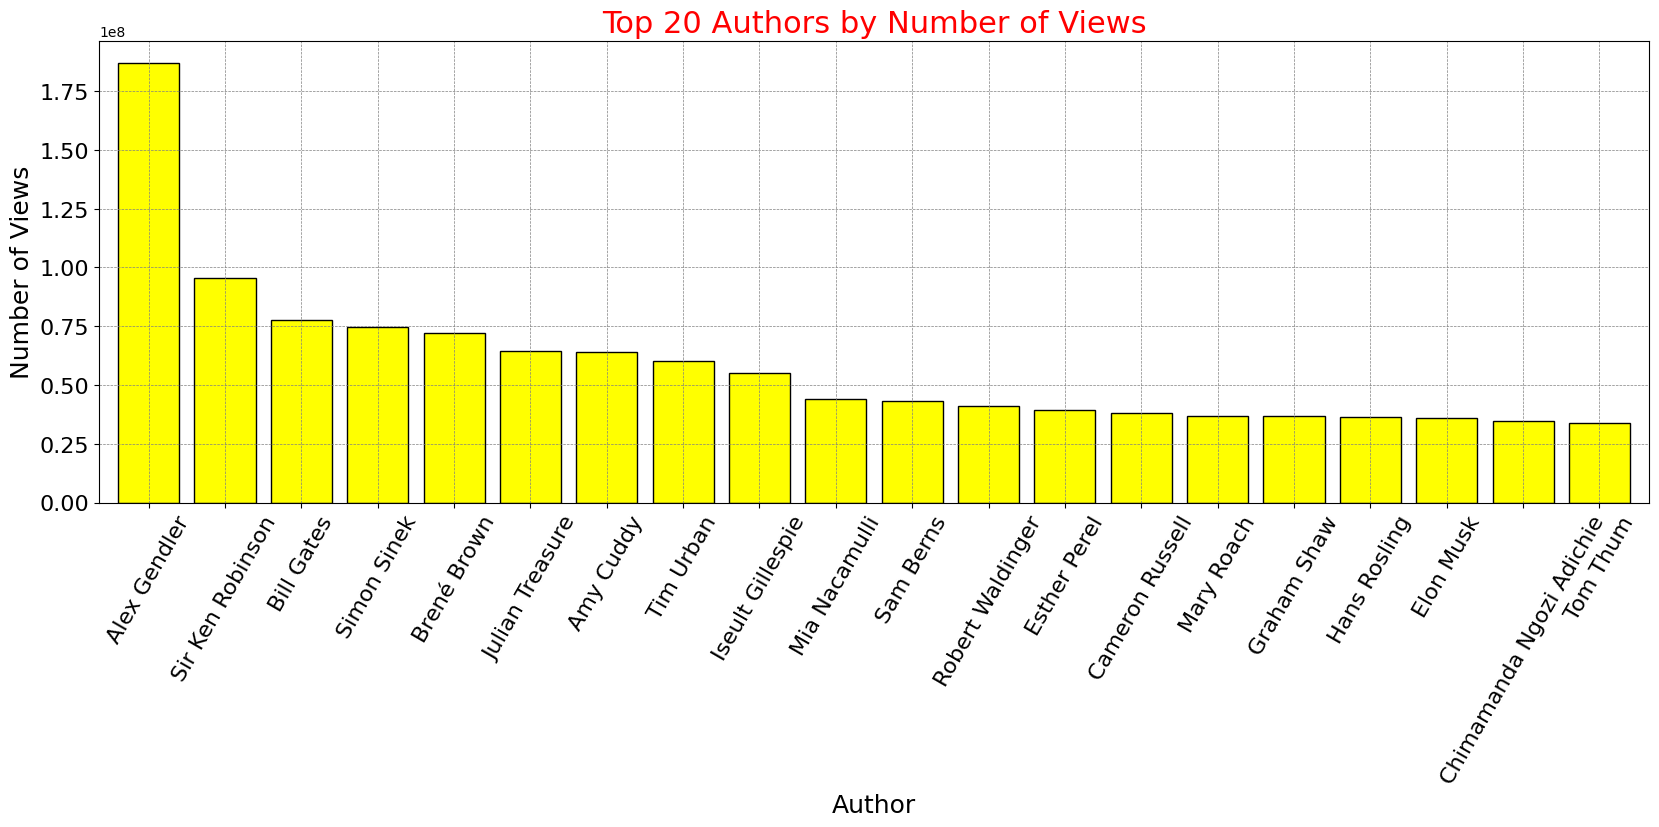

In [26]:
ax = df.groupby(by='author').sum()['views'].sort_values(ascending=False).head(20).plot(
    kind='bar',
    color='yellow',        
    edgecolor='black',      
    figsize=(20, 6),        
    width=0.8               
)

ax.set_title('Top 20 Authors by Number of Views', fontsize=22, color='Red')
ax.set_xlabel('Author', fontsize=18, color='black')
ax.set_ylabel('Number of Views', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=16, colors='black')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=16, colors='black')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')


##### 5.1.3) Top 20 Authors with Most number of likes as Ted.

In [27]:
df.groupby(by = 'author').sum()['likes'].sort_values(ascending = False).head(20)

author
Alex Gendler                5691000
Sir Ken Robinson            2833600
Bill Gates                  2349000
Simon Sinek                 2246000
Brené Brown                 2204000
Amy Cuddy                   1900000
Julian Treasure             1870000
Tim Urban                   1800000
Iseult Gillespie            1660900
Mia Nacamulli               1395000
Sam Berns                   1300000
Robert Waldinger            1200000
Esther Perel                1196000
Hans Rosling                1102000
Mary Roach                  1100000
Graham Shaw                 1100000
Cameron Russell             1100000
Elon Musk                   1085000
Chimamanda Ngozi Adichie    1055000
Tom Thum                    1000000
Name: likes, dtype: int64

##### 5.1.3.1) Bar graph for the Top 20 Authors with Most number of likes as Ted.

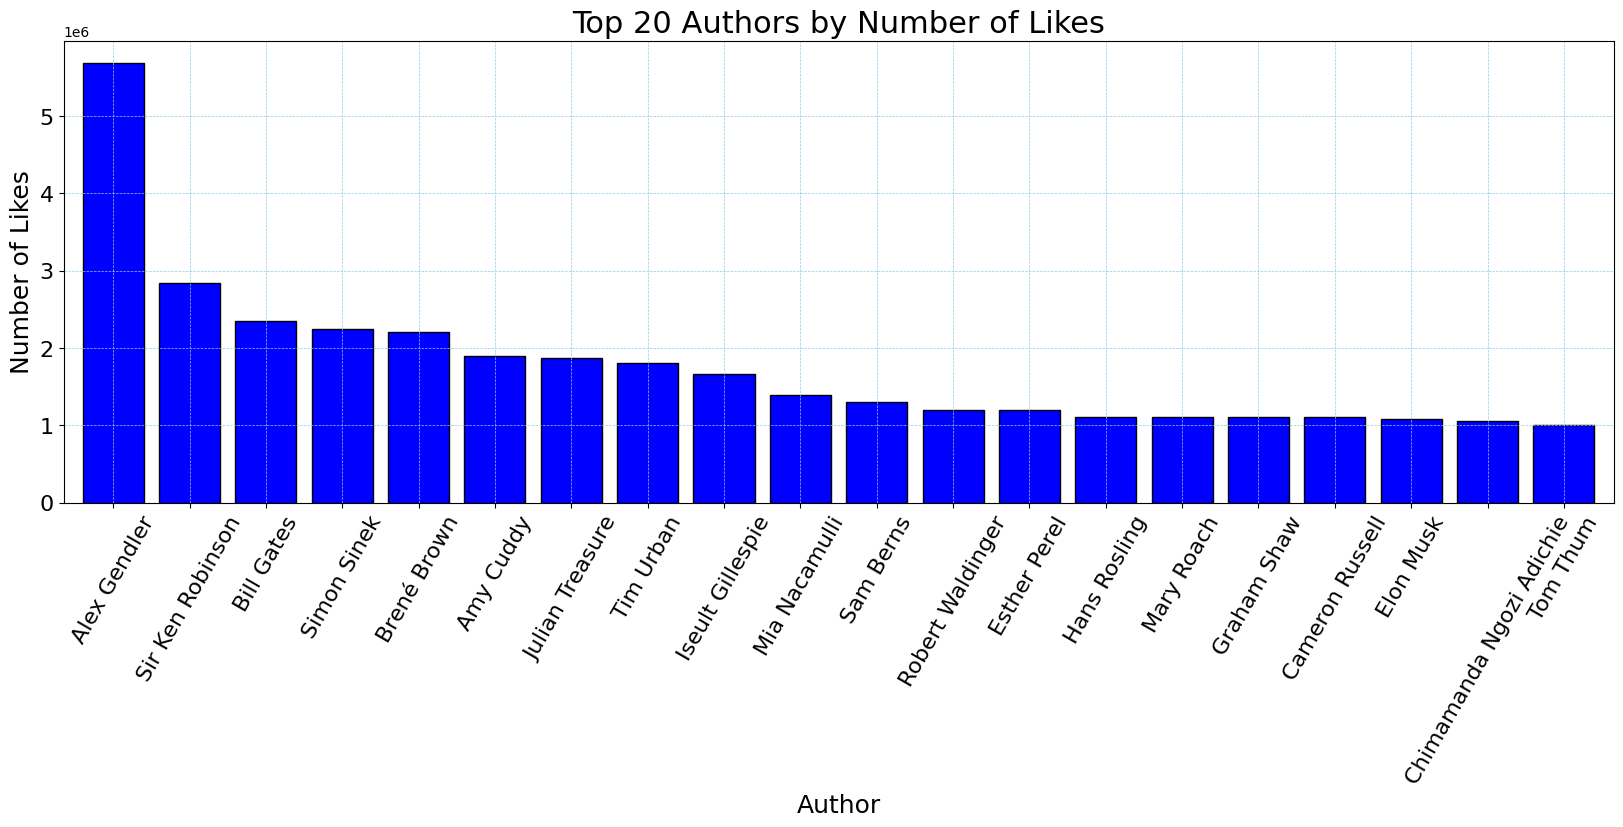

In [28]:
ax = df.groupby(by='author').sum()['likes'].sort_values(ascending=False).head(20).plot(
    kind='bar',
    color='blue',        
    edgecolor='black',      
    figsize=(20, 6),        
    width=0.8               
)

ax.set_title('Top 20 Authors by Number of Likes', fontsize=22, color='black')
ax.set_xlabel('Author', fontsize=18, color='black')
ax.set_ylabel('Number of Likes', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=16, colors='black')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=16, colors='black')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='skyblue')

plt.show()

##### 5.1.4) Top 10 Authors with best views to like ratio.

In [29]:
df.groupby(by = 'author').mean(numeric_only = True)['views_to_like_ratio'].sort_values(ascending = False).head(10)

author
David Lindell            36.40
Ioannis Papachimonas     36.18
Sandra Fisher-Martins    36.10
Srdja Popovic            36.09
Virginia Postrel         36.08
Paul Snelgrove           36.00
Philip Krinks            36.00
Mick Mountz              36.00
Nathalia Holt            36.00
Jonas Gahr Støre         35.92
Name: views_to_like_ratio, dtype: float64

##### 5.1.4.1) Pie graph of Top 10 Authors with best views to like ratio.

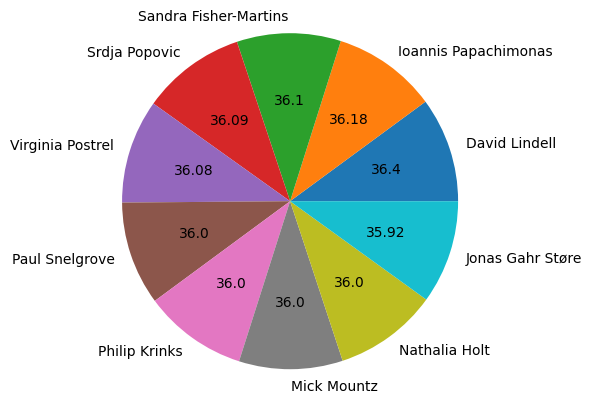

In [30]:
top_authors = df.groupby(by = 'author').mean(numeric_only = True)['views_to_like_ratio'].sort_values(ascending = False).head(10)
labels = top_authors.index
sizes = top_authors.values

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a

plt.pie(sizes, labels=labels, 
        autopct=absolute_value)

plt.axis('equal')
plt.show()

In [31]:
df.groupby(by='author').sum()['views_to_like_ratio'].sort_values(ascending = False).head(10)

author
Alex Gendler        1494.10
Iseult Gillespie    1102.82
Matt Walker          610.30
Alex Rosenthal       512.47
Elizabeth Cox        436.54
Emma Bryce           395.32
Juan Enriquez        364.77
Daniel Finkel        363.10
Wendy De La Rosa     304.02
Mona Chalabi         303.08
Name: views_to_like_ratio, dtype: float64

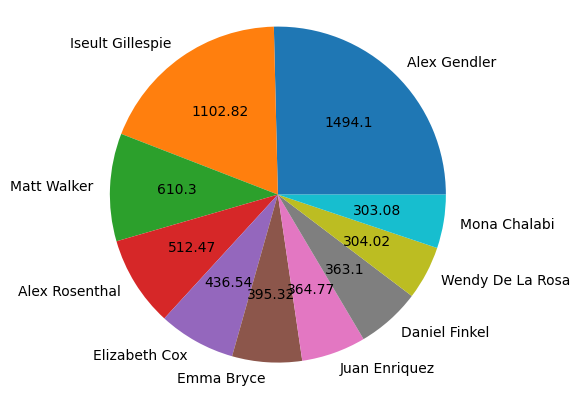

In [32]:
top_authors = df.groupby(by = 'author').sum()['views_to_like_ratio'].sort_values(ascending = False).head(10)
labels = top_authors.index
sizes = top_authors.values

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a

plt.pie(sizes, labels=labels, 
        autopct=absolute_value)

plt.axis('equal')
plt.show()

#### 5.2 Timeframe | Date,Month,Year.

##### 5.2.1) Number of videos published each month.

In [33]:
df.groupby(by = 'month').size().sort_values()

month
January      145
August       200
May          321
December     333
September    349
July         445
June         493
April        576
March        579
October      585
November     682
February     723
dtype: int64

##### 5.2.1.1) Pie chart for the Number of videos published each month.

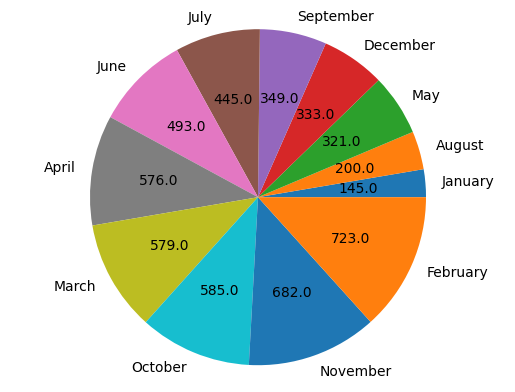

In [34]:
months = df.groupby(by = 'month').size().sort_values()
 
labels = months.index
sizes = months.values

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a

plt.pie(sizes, labels=labels, 
        autopct=absolute_value)

plt.axis('equal')
plt.show()

##### 5.2.2) Number of videos published each year.

In [35]:
df.groupby(by = 'year').size()

year
1998      6
2001      5
2002     26
2003     34
2004     33
2005     65
2006     49
2007    113
2008     84
2009    233
2010    267
2011    271
2012    302
2013    388
2014    357
2015    376
2016    399
2017    495
2018    473
2019    544
2020    501
2021    390
2022     20
dtype: int64

##### 5.2.2.1) Bar graph for the Number of videos published each year.

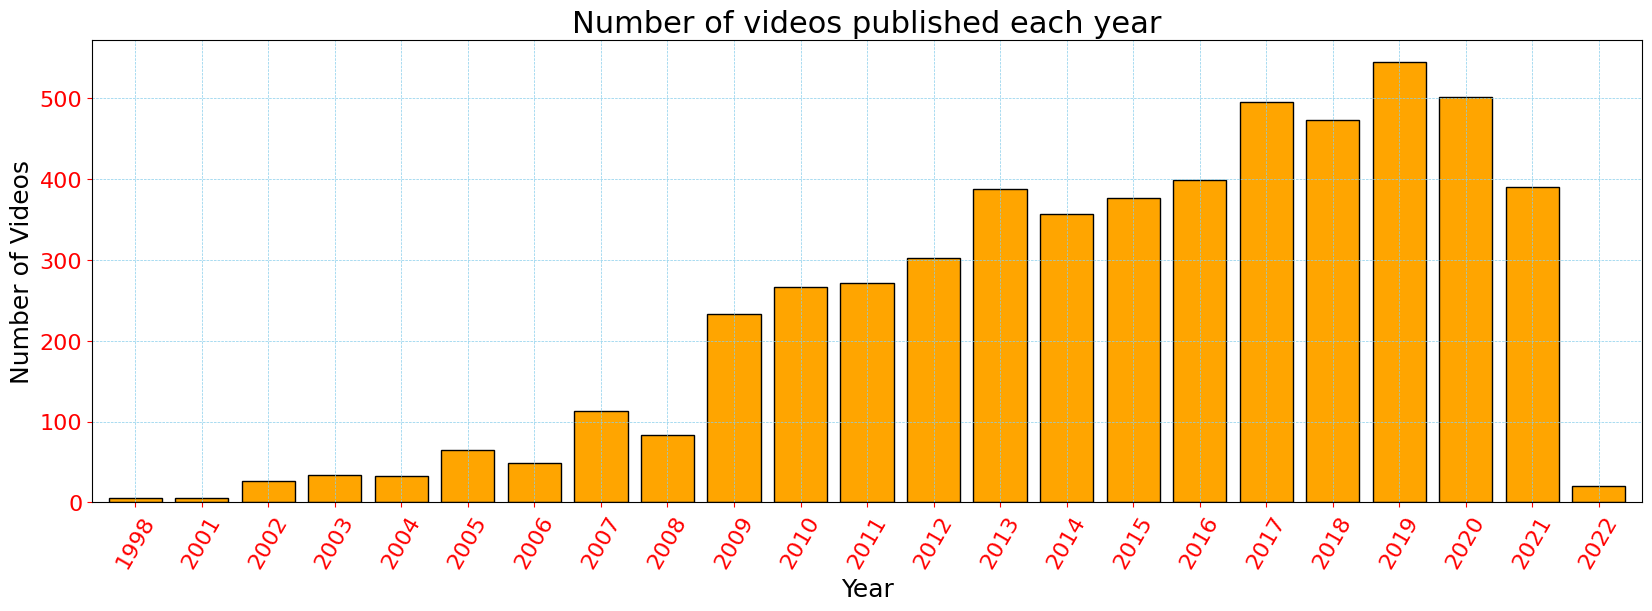

In [36]:
ax = df.groupby(by = 'year').size().plot(
    kind='bar',
    color='orange',        
    edgecolor='black',      
    figsize=(20, 6),        
    width=0.8               
)

ax.set_title('Number of videos published each year', fontsize=22, color='black')
ax.set_xlabel('Year', fontsize=18, color='black')
ax.set_ylabel('Number of Videos', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=16, colors='red')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=16, colors='red')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='skyblue')

plt.show()

##### 5.2.3) Top 20 months of the year where most number of videos published.

In [37]:
df.groupby(by = 'date').size().sort_values(ascending = False).head(20)


date
April 2018       127
April 2019       124
April 2017       123
November 2018    115
November 2017    109
October 2020      97
March 2014        96
February 2016     89
March 2015        88
June 2012         84
February 2009     84
October 2014      83
June 2013         80
February 2013     77
March 2011        76
October 2021      72
July 2011         70
February 2010     70
November 2015     68
June 2020         67
dtype: int64

##### 5.2.3.1) Bar graph for the Top 20 months of the year where most number of videos published.

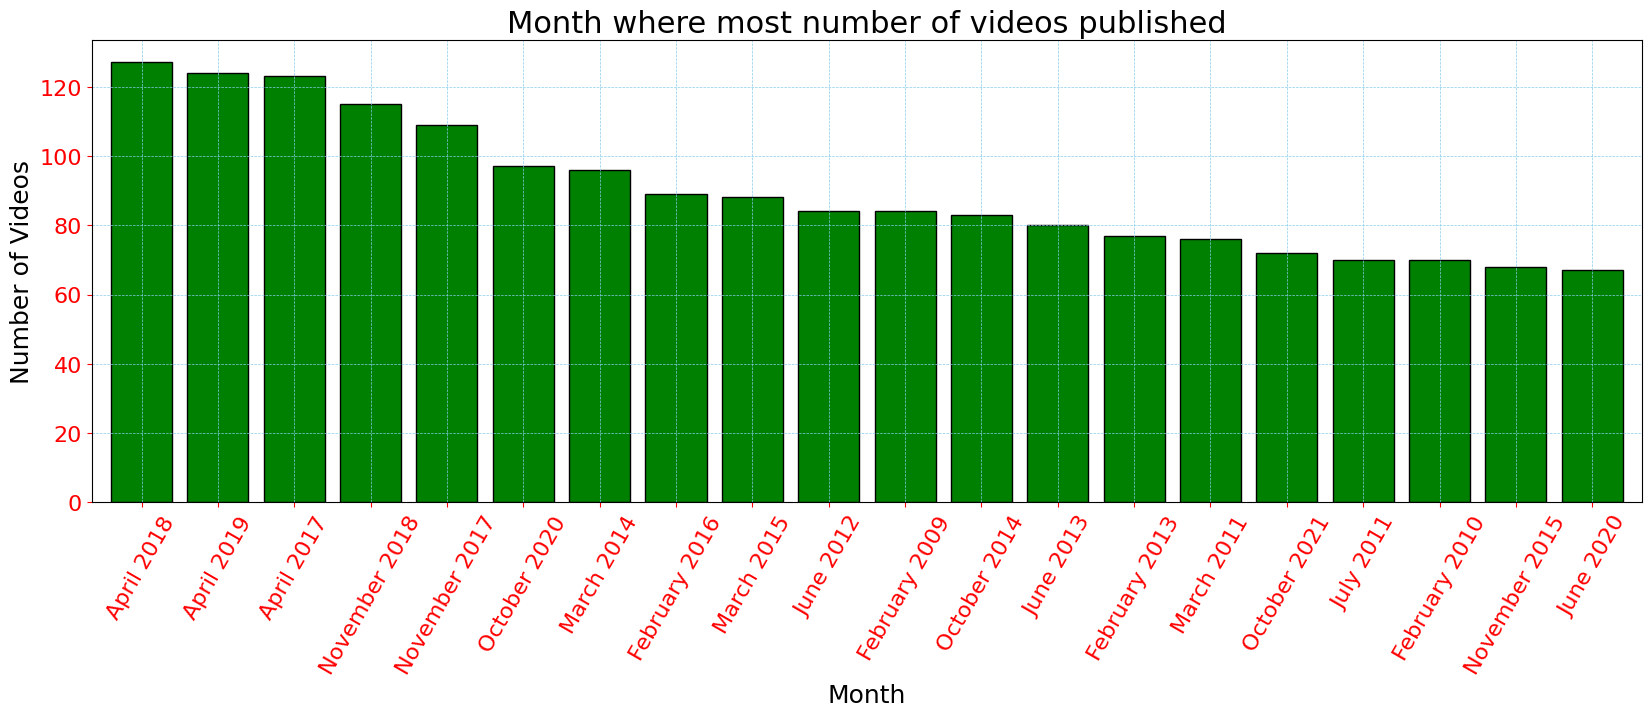

In [38]:
ax = df.groupby(by = 'date').size().sort_values(ascending = False).head(20).plot(
    kind='bar',
    color='Green',        
    edgecolor='black',      
    figsize=(20, 6),        
    width=0.8               
)

ax.set_title('Month where most number of videos published', fontsize=22, color='black')
ax.set_xlabel('Month', fontsize=18, color='black')
ax.set_ylabel('Number of Videos', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=16, colors='red')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=16, colors='red')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='skyblue')

plt.show()


##### 5.2.4) Number of Views got in each month.

In [39]:
df.groupby(by = 'month').sum()['views'].sort_values(ascending = False)

month
February     1982776996
March        1374553896
April        1214604196
November     1180802199
June         1164034699
October       965331498
July          864042799
May           656959600
September     606392100
December      601964300
January       302598399
August        295820997
Name: views, dtype: int64

##### 5.2.4.1) Bar graph for the Number of Views got in each month.

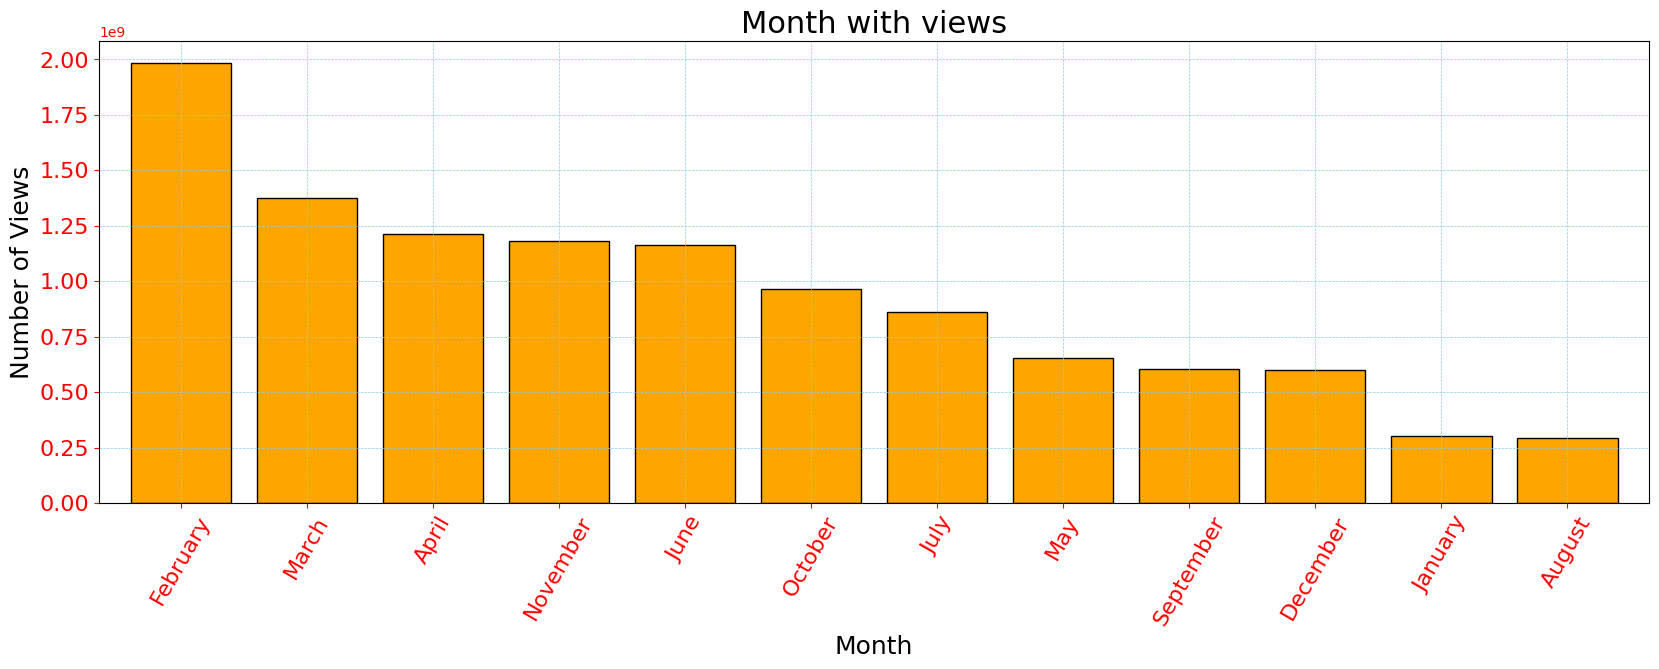

In [40]:
ax = df.groupby(by = 'month').sum()['views'].sort_values(ascending = False).plot(
    kind='bar',
    color='orange',
    edgecolor='black',      
    figsize=(20, 6),        
    width=0.8               
)

ax.set_title('Month with views', fontsize=22, color='black')
ax.set_xlabel('Month', fontsize=18, color='black')
ax.set_ylabel('Number of Views', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=16, colors='red')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=16, colors='red')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='skyblue')

plt.show()

##### 5.2.5) Number of likes got in each month.

In [41]:
df.groupby(by = 'month').sum()['likes'].sort_values(ascending = False)

month
February     60123856
March        41815175
April        36985230
November     35867373
June         35242674
October      29302963
July         26234756
May          19920849
September    18433456
December     18309597
January       9188542
August        9008649
Name: likes, dtype: int64

##### 5.2.5) Bar Graph for the Number of likes got in each month.

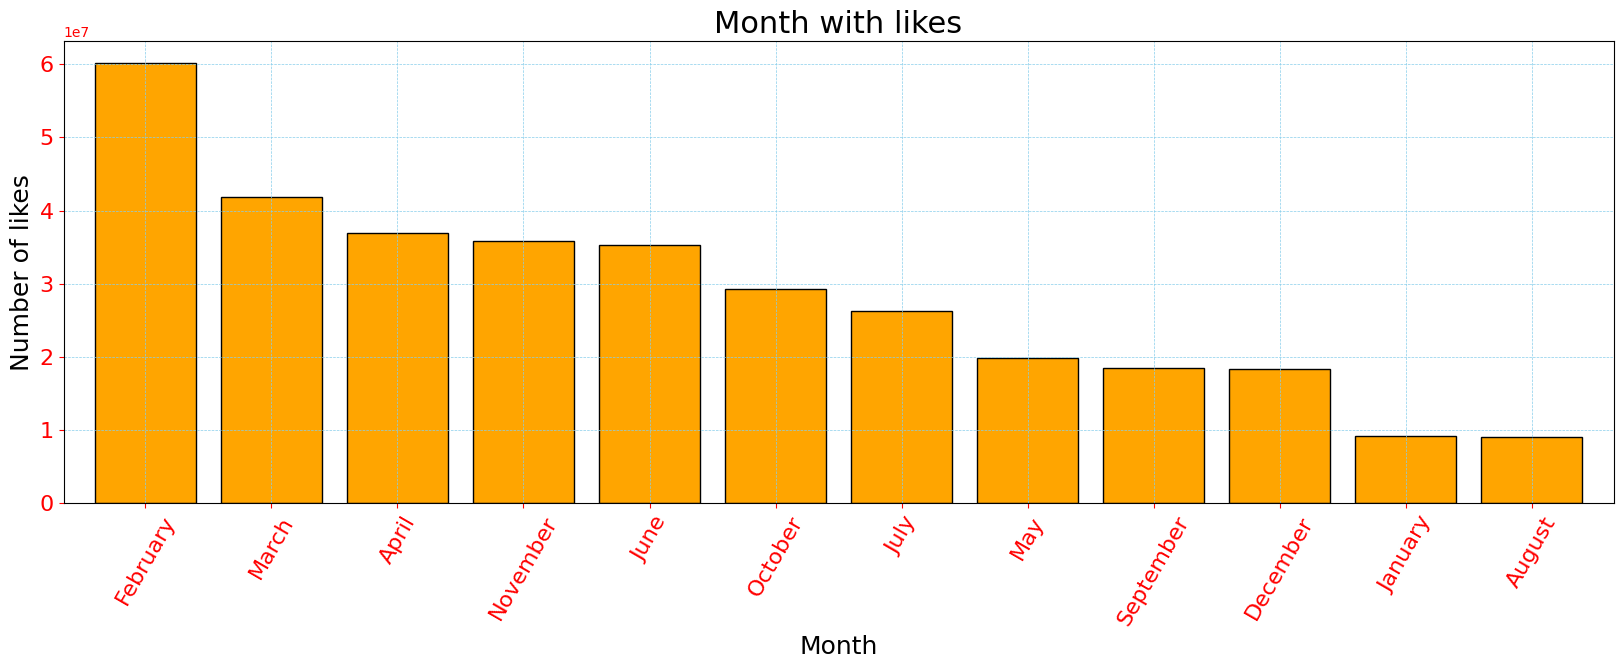

In [42]:
ax = df.groupby(by = 'month').sum()['likes'].sort_values(ascending = False).plot(
    kind='bar',
    color='orange',
    edgecolor='black',      
    figsize=(20, 6),        
    width=0.8               
)

ax.set_title('Month with likes', fontsize=22, color='black')
ax.set_xlabel('Month', fontsize=18, color='black')
ax.set_ylabel('Number of likes', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=16, colors='red')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=16, colors='red')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='skyblue')

plt.show()
    

##### 5.2.6) Number of Views got in each month and year.

In [43]:
df.groupby(by = ['month','year']).sum()['views'].sort_values(ascending = False).head(20)
#df.groupby(by = 'date').sum()['views'].sort_values(ascending = False)

month     year
April     2017    340630000
February  2016    324611999
March     2015    309542999
June      2013    283503999
March     2014    276655999
February  2013    256887999
April     2019    254327999
          2018    231529799
June      2012    215098000
February  2009    206860000
November  2015    202900000
          2017    189333000
March     2011    187495999
November  2018    177155100
February  2006    173364999
          2010    167233999
July      2011    160816000
          2009    158494000
March     2012    137574000
February  2008    132800000
Name: views, dtype: int64

##### 5.2.6.1) Bar graph of Top 20 Number of Views got in each month and year.

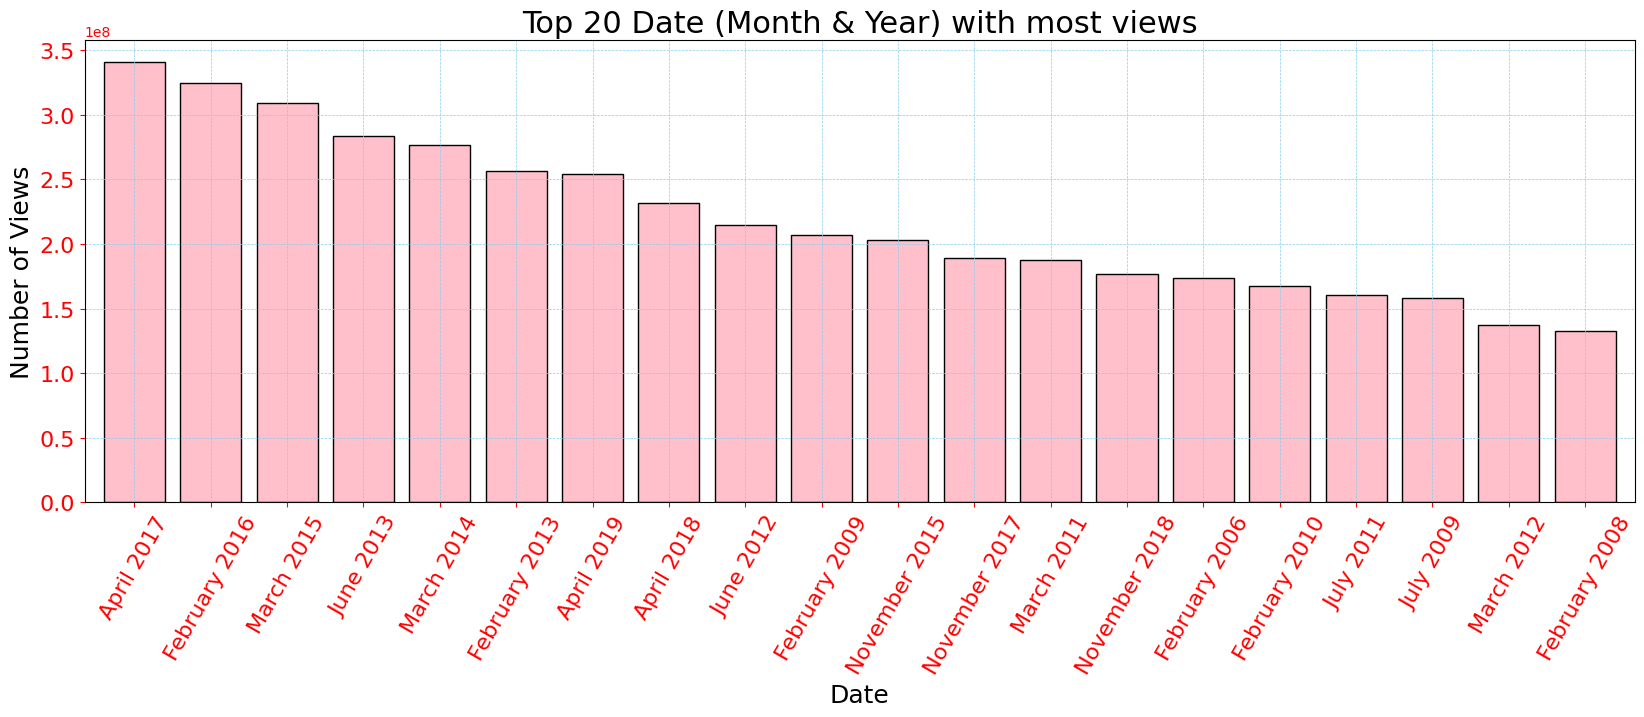

In [44]:
ax = df.groupby(by = 'date').sum()['views'].sort_values(ascending = False).head(20).plot(
    kind='bar',
    color='pink',
    edgecolor='black',      
    figsize=(20, 6),        
    width=0.8               
)

ax.set_title('Top 20 Date (Month & Year) with most views', fontsize=22, color='black')
ax.set_xlabel('Date', fontsize=18, color='black')
ax.set_ylabel('Number of Views', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=16, colors='red')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=16, colors='red')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='skyblue')

plt.show()


##### 5.2.7) Number of likes got in each month and year.

In [45]:
#df.groupby(by = ['month','year']).sum()['likes'].sort_values(ascending = False)
df.groupby(by = 'date').sum()['likes'].sort_values(ascending = False).head(20)

date
April 2017       10449301
February 2016     9869383
March 2015        9442066
June 2013         8515000
March 2014        8397200
February 2013     7819000
April 2019        7688353
April 2018        7033279
June 2012         6480000
February 2009     6265000
November 2015     6181029
November 2017     5784682
March 2011        5700100
November 2018     5365122
February 2006     5167400
February 2010     5058900
July 2011         4886000
July 2009         4792000
March 2012        4208500
February 2008     4037100
Name: likes, dtype: int64

##### 5.2.7.1) Bar Graph of Top 20 Number of likes got in each month and year.

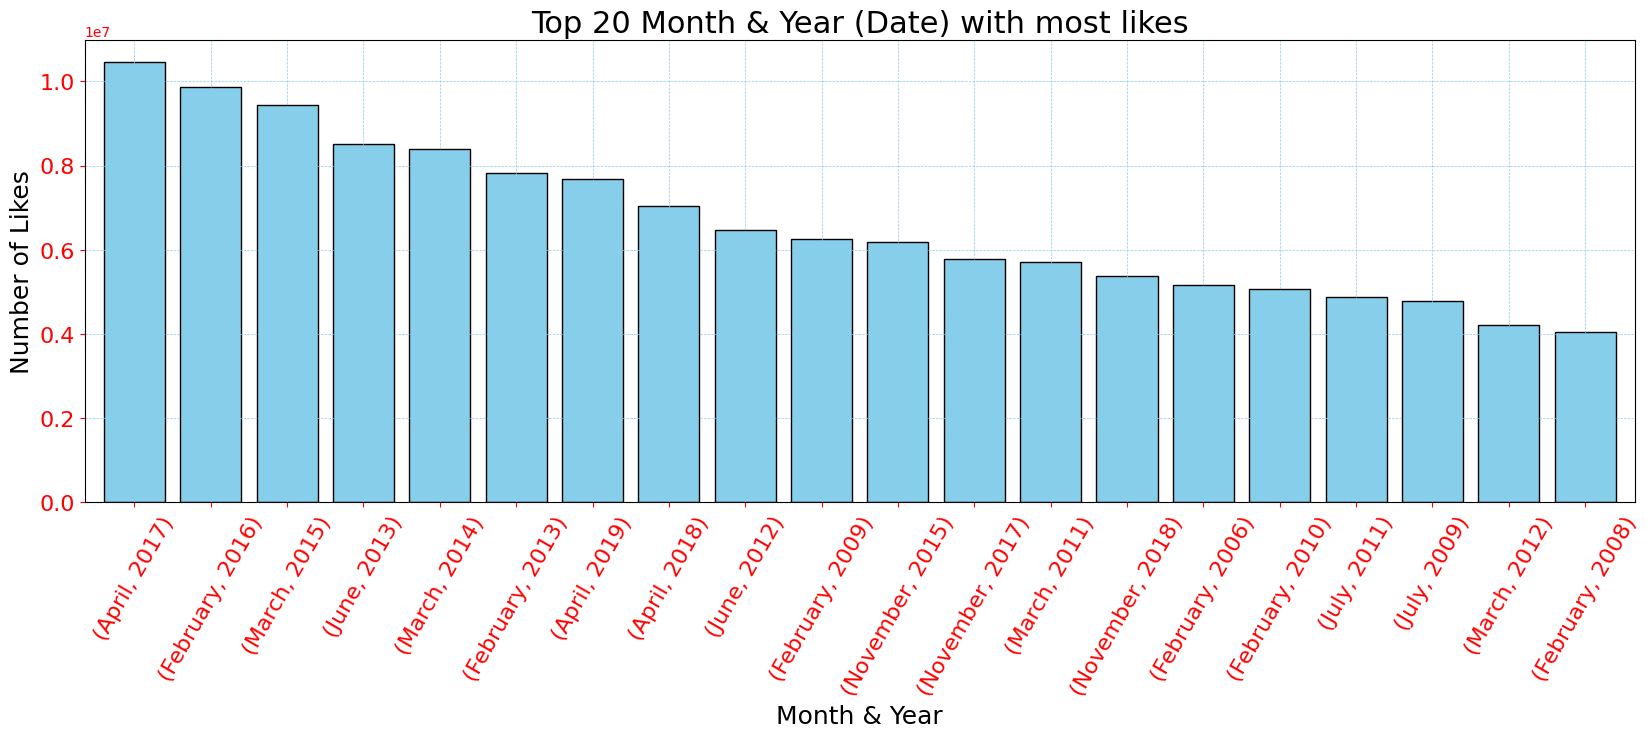

In [46]:
ax = df.groupby(by = ['month','year']).sum()['likes'].sort_values(ascending = False).head(20).plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',      
    figsize=(20, 6),        
    width=0.8               
)

ax.set_title('Top 20 Month & Year (Date) with most likes', fontsize=22, color='black')
ax.set_xlabel('Month & Year', fontsize=18, color='black')
ax.set_ylabel('Number of Likes', fontsize=18, color='black')

ax.tick_params(axis='x', rotation=60, labelsize=16, colors='red')  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=16, colors='red')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='skyblue')

plt.show()

    

### Top 10 Video with thier highest and lowest views,likes and views_to_likes_ratio.

##### 5.3.1) Top 10 videos with highest views.   

In [47]:
df.nlargest(n=10, columns='views')


,title,author,date,views,likes,link,month,year,views_to_like_ratio
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,sir_ken_robinson_do_schools_kill_creativity,February,2006,34.29
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,amy_cuddy_your_body_language_may_shape_who_you...,June,2012,33.68
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,tim_urban_inside_the_mind_of_a_master_procrast...,February,2016,33.33
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,simon_sinek_how_great_leaders_inspire_action,September,2009,33.53
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,brene_brown_the_power_of_vulnerability,June,2010,32.94
3504,How to speak so that people want to listen,Julian Treasure,June 2013,49000000,1400000,julian_treasure_how_to_speak_so_that_people_wa...,June,2013,35.00
2168,My philosophy for a happy life,Sam Berns,October 2013,43000000,1300000,sam_berns_my_philosophy_for_a_happy_life,October,2013,33.08
3251,The next outbreak? We're not ready,Bill Gates,March 2015,43000000,1300000,bill_gates_the_next_outbreak_we_re_not_ready,March,2015,33.08
3017,What makes a good life? Lessons from the longe...,Robert Waldinger,November 2015,41000000,1200000,robert_waldinger_what_makes_a_good_life_lesson...,November,2015,34.17
3994,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,October 2012,38000000,1100000,cameron_russell_looks_aren_t_everything_believ...,October,2012,34.55


##### 5.3.2) Top 10 videos with highest likes.   

In [48]:
df.nlargest(n=10, columns='likes')

,title,author,date,views,likes,link,month,year,views_to_like_ratio
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,sir_ken_robinson_do_schools_kill_creativity,February,2006,34.29
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,amy_cuddy_your_body_language_may_shape_who_you...,June,2012,33.68
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,tim_urban_inside_the_mind_of_a_master_procrast...,February,2016,33.33
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,brene_brown_the_power_of_vulnerability,June,2010,32.94
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,simon_sinek_how_great_leaders_inspire_action,September,2009,33.53
3504,How to speak so that people want to listen,Julian Treasure,June 2013,49000000,1400000,julian_treasure_how_to_speak_so_that_people_wa...,June,2013,35.00
2168,My philosophy for a happy life,Sam Berns,October 2013,43000000,1300000,sam_berns_my_philosophy_for_a_happy_life,October,2013,33.08
3251,The next outbreak? We're not ready,Bill Gates,March 2015,43000000,1300000,bill_gates_the_next_outbreak_we_re_not_ready,March,2015,33.08
3017,What makes a good life? Lessons from the longe...,Robert Waldinger,November 2015,41000000,1200000,robert_waldinger_what_makes_a_good_life_lesson...,November,2015,34.17
2166,Why people believe they can't draw,Graham Shaw,February 2015,37000000,1100000,graham_shaw_why_people_believe_they_can_t_draw,February,2015,33.64


##### 5.3.3) Top 10 videos with lowest views.   

In [49]:
df.nsmallest(n=10,columns='views')

,title,author,date,views,likes,link,month,year,views_to_like_ratio
613,Post-Pandemic Paradise in Rapa Nui,Far Flung,October 2020,1200,37,far_flung_post_pandemic_paradise_in_rapa_nui,October,2020,32.43
552,Virtual Worlds,Far Flung,November 2020,1300,39,far_flung_virtual_worlds,November,2020,33.33
1064,"""Jamie Raeburn"" / ""Baloo Baleerie"" / ""Twa recr...",Findlay Napier and Gillian Frame,July 2019,1300,40,findlay_napier_and_gillian_frame_jamie_raeburn...,July,2019,32.50
1692,"""Part II. The Journey Through Time"" / ""Ruslan ...",Deutsche Philharmonie Merck,November 2018,1300,40,deutsche_philharmonie_merck_part_ii_the_journe...,November,2018,32.50
478,The case for public media,Qi Wu 吴琪,November 2020,1500,47,qi_wu_the_case_for_public_media,November,2020,31.91
20,"""Dive In""",Dave Matthews,October 2021,1600,49,dave_matthews_dive_in,October,2021,32.65
541,A chef shares: Here's how we can feed the plan...,Peggy Chan,October 2020,2100,65,peggy_chan_a_chef_shares_here_s_how_we_can_fee...,October,2020,32.31
2230,Facing the future together,Rowan Fitzpatrick and Heart of Mind,December 2017,2200,68,rowan_fitzpatrick_and_heart_of_mind_facing_the...,December,2017,32.35
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,mahendra_singhi_cement_s_carbon_problem_and_2_...,October,2021,33.33
362,The revolutionary power of Black joy,Miracle Jones,April 2021,2400,74,miracle_jones_the_revolutionary_power_of_black...,April,2021,32.43


##### 5.3.4) Top 10 videos with lowest likes.   

In [50]:
df.nsmallest(n=10,columns='likes')

,title,author,date,views,likes,link,month,year,views_to_like_ratio
613,Post-Pandemic Paradise in Rapa Nui,Far Flung,October 2020,1200,37,far_flung_post_pandemic_paradise_in_rapa_nui,October,2020,32.43
552,Virtual Worlds,Far Flung,November 2020,1300,39,far_flung_virtual_worlds,November,2020,33.33
1064,"""Jamie Raeburn"" / ""Baloo Baleerie"" / ""Twa recr...",Findlay Napier and Gillian Frame,July 2019,1300,40,findlay_napier_and_gillian_frame_jamie_raeburn...,July,2019,32.50
1692,"""Part II. The Journey Through Time"" / ""Ruslan ...",Deutsche Philharmonie Merck,November 2018,1300,40,deutsche_philharmonie_merck_part_ii_the_journe...,November,2018,32.50
478,The case for public media,Qi Wu 吴琪,November 2020,1500,47,qi_wu_the_case_for_public_media,November,2020,31.91
20,"""Dive In""",Dave Matthews,October 2021,1600,49,dave_matthews_dive_in,October,2021,32.65
541,A chef shares: Here's how we can feed the plan...,Peggy Chan,October 2020,2100,65,peggy_chan_a_chef_shares_here_s_how_we_can_fee...,October,2020,32.31
2230,Facing the future together,Rowan Fitzpatrick and Heart of Mind,December 2017,2200,68,rowan_fitzpatrick_and_heart_of_mind_facing_the...,December,2017,32.35
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,mahendra_singhi_cement_s_carbon_problem_and_2_...,October,2021,33.33
2273,"""Good Morning Young Artist"" and ""Ms. Metronome""",Mike Sempert,September 2014,2400,72,mike_sempert_good_morning_young_artist_and_ms_...,September,2014,33.33


##### 5.3.5) Top 10 videos with highest views_to_like_ratio.   

In [51]:
df.nlargest(n=10, columns='views_to_like_ratio')

,title,author,date,views,likes,link,month,year,views_to_like_ratio
837,How to see more and care less: The art of Geor...,Iseult Gillespie,June 2020,364000,10000,iseult_gillespie_how_to_see_more_and_care_less...,June,2020,36.40
905,What's the point(e) of ballet?,Ming Luke,April 2020,364000,10000,ming_luke_what_s_the_point_e_of_ballet,April,2020,36.40
955,A camera that can see around corners,David Lindell,November 2019,364000,10000,david_lindell_a_camera_that_can_see_around_cor...,November,2019,36.40
26,Can you outsmart the fallacy that divided a na...,Elizabeth Cox,February 2022,363000,10000,elizabeth_cox_can_you_outsmart_the_fallacy_tha...,February,2022,36.30
1016,The function and fashion of eyeglasses,Debbie Millman,January 2020,363000,10000,debbie_millman_the_function_and_fashion_of_eye...,January,2020,36.30
3089,How computers translate human language,Ioannis Papachimonas,October 2015,398000,11000,ioannis_papachimonas_how_computers_translate_h...,October,2015,36.18
4389,The right to understand,Sandra Fisher-Martins,March 2011,361000,10000,sandra_fisher_martins_the_right_to_understand,March,2011,36.10
4362,How to topple a dictator,Srdja Popovic,November 2011,397000,11000,srdja_popovic_how_to_topple_a_dictator,November,2011,36.09
5129,On glamour,Virginia Postrel,February 2004,433000,12000,virginia_postrel_on_glamour,February,2004,36.08
1125,Hacking bacteria to fight cancer,Tal Danino,December 2019,396000,11000,tal_danino_hacking_bacteria_to_fight_cancer,December,2019,36.00


##### 5.3.5) Top 10 videos with lowest views_to_like_ratio.   

In [52]:
df.nsmallest(n=10, columns='views_to_like_ratio')

,title,author,date,views,likes,link,month,year,views_to_like_ratio
1112,The importance of queer allyship in the classroom,Coby Everton,November 2019,10000,329,coby_everton_the_importance_of_queer_allyship_...,November,2019,30.40
1071,Three stories of Scotland,Mackenzie Dalrymple,July 2019,11000,359,mackenzie_dalrymple_three_stories_of_scotland,July,2019,30.64
1462,Solar energy can help put power back in the ha...,Scott Nguyen,April 2019,10000,326,scott_nguyen_solar_energy_can_help_put_power_b...,April,2019,30.67
3137,Imagining a new future for health systems in A...,Mathieu Lamiaux,June 2015,10000,326,mathieu_lamiaux_imagining_a_new_future_for_hea...,June,2015,30.67
1733,A brie(f) history of cheese,Paul S. Kindstedt,December 2018,11000000,358000,paul_s_kindstedt_a_brie_f_history_of_cheese,December,2018,30.73
2558,Why you should define your fears instead of yo...,Tim Ferriss,April 2017,10000000,325000,tim_ferriss_why_you_should_define_your_fears_i...,April,2017,30.77
2491,There's more to life than being happy,Emily Esfahani Smith,April 2017,11000000,357000,emily_esfahani_smith_there_s_more_to_life_than...,April,2017,30.81
1761,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,November 2018,12000,389,alejandro_chaskielberg_como_usar_el_arte_de_la...,November,2018,30.85
2918,Why do cats act so weird?,Tony Buffington,April 2016,11000000,356000,tony_buffington_why_do_cats_act_so_weird,April,2016,30.90
2247,How we'll predict the next refugee crisis,Rana Novack,December 2017,12000,388,rana_novack_how_we_ll_predict_the_next_refugee...,December,2017,30.93
